In [1]:
import pandas as pd
import numpy as np
# import seaborn as sns
# import matplotlib
import matplotlib.pyplot as plt
# import random
# import time
# %matplotlib inline
# import matplotlib.animation as animation
# import csv
# matplotlib.style.use('seaborn')

from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.decomposition import PCA
# from sklearn import manifold
# from sklearn.cluster import AgglomerativeClustering
# from scipy.cluster import hierarchy
# from sklearn.cluster import DBSCAN
# from sklearn.metrics.pairwise import pairwise_distances
# # from wordcloud import WordCloud
# from sklearn.feature_extraction import text

# from mpl_toolkits.mplot3d import Axes3D

In [2]:
blog_data=pd.read_csv("blogtext.csv")

In [3]:
blog_data.drop_duplicates(subset="text",inplace=True)
blog_data.date = pd.to_datetime(blog_data.date,format="%d,%B,%Y", errors='coerce')#pd.to_datetime(blog_data.date,errors="coerce",infer_datetime_format=True)
print(blog_data.shape)
blog_data.sample(20)

(611652, 7)


,id,gender,age,topic,sign,date,text
545521,1636406,male,23,Student,Scorpio,2004-05-03,Today I'm going to go nuts on Kan...
487230,3906690,male,23,Technology,Leo,2004-07-13,Early off :D...Didn’t feel like working muc...
494552,665284,female,25,Technology,Libra,2003-02-04,IT Stephen King The real terror s...
606226,4128402,male,17,Student,Virgo,2004-08-16,And lo i make my illustrious return to ...
590652,3897591,male,15,Student,Libra,2004-07-11,I cant believe i got cheated to come to...
396799,4226483,male,17,indUnk,Pisces,2004-08-16,Prom is so far away but it seems to be ...
116287,3931664,female,16,indUnk,Aries,2004-07-19,I took this on my b day.. my fav cloud pict...
112657,1756743,female,36,indUnk,Virgo,2003-11-21,Today is Friday!! I never thought this...
66616,91374,male,26,indUnk,Taurus,2002-12-16,urlLink mi (formerly MMKEdit) is...
282805,3864391,male,24,Biotech,Scorpio,2004-07-08,I was walking along the city stre...


In [4]:
# ####################################################################################################
# #####                            Sampling for code develpoment 
# #####                            Remove after validating code
# ####################################################################################################

# blog_data=blog_data.sample(frac=.05)#.02

# print("******WARNING****** \n DATASET SAMPLED!!!!!!")
# print(blog_data.shape)

In [5]:
# adit_stpwrds=["urllink","nbsp","ve","ll"]
# stp_wrds = text.ENGLISH_STOP_WORDS.union(adit_stpwrds)

# Word Frequencies
tomar las 500 más frecuentes luego de eliminar las 150 primeras (tomándolas como stopwords)

In [6]:
count_vect = CountVectorizer(max_features=150+500)#,stop_words=stp_wrds)#,ngram_range=(1,2))
n_grams_counts = count_vect.fit_transform(blog_data["text"])#.toarray()
n_grams_counts.shape
#count_vect.get_feature_names()

(611652, 650)

In [7]:
top_n=650

In [8]:
# plt.figure(figsize=(16,16))
# plt.spy(n_grams_counts,markersize=.5, marker="o",aspect='auto')
# plt.title("Word Frequencies")

txt_info= n_grams_counts.toarray().sum(axis=0)
indices = np.argsort(txt_info)[::-1]
features =count_vect.get_feature_names()
top_features = np.array([[features[i],float(txt_info[i])] for i in indices])#[:top_n]])
print(pd.DataFrame({"word":top_features[:,0],"freq":top_features[:,1]})[:100])

       word       freq
0       the  4951613.0
1        to  3701588.0
2       and  3401503.0
3        of  2257522.0
4        it  1879591.0
5      that  1740343.0
6        in  1644402.0
7        my  1372052.0
8        is  1316817.0
9       you  1253035.0
10      for  1138222.0
11      was  1112150.0
12       on   914554.0
13       me   894802.0
14      but   869611.0
15       so   845116.0
16     with   814292.0
17     this   812784.0
18     have   796855.0
19       we   749378.0
20       be   731514.0
21       at   654509.0
22       he   648290.0
23      not   642044.0
24      all   591590.0
25       as   549606.0
26     like   527678.0
27     just   520259.0
28      are   515983.0
29     they   487047.0
..      ...        ...
70     been   252878.0
71      how   252636.0
72      got   249593.0
73      has   248108.0
74     were   247756.0
75      him   247017.0
76     them   236605.0
77     back   232209.0
78    going   231375.0
79      day   230174.0
80  because   229213.0
81      see

In [9]:
top_features[150:,0]

array(['though', 'school', 'always', 'ever', 'better', 'myself', 'let',
       'year', 'another', 'many', 'since', 'maybe', 'friends', 'next',
       'thought', 'world', 'look', 'through', 'fun', 'few', 'man', 'bad',
       'week', 'someone', 'find', 'im', 'actually', 'god', 'lot', 'sure',
       'days', 'pretty', 'away', 'getting', 'every', 'tell', 'years',
       'house', 'best', 'came', 'old', 'may', 'same', 'nothing',
       'anything', 'blog', 'stuff', 'doing', 'read', 'everyone', 'guess',
       'left', 'place', 'nice', 'put', 'told', 'end', 'own', 'friend',
       'yeah', 'big', 'happy', 'anyway', 'everything', 'does', 'person',
       'give', 'such', 'hope', 'until', 'guy', 'morning', 'enough', 'ok',
       'mean', 'done', 'yes', 'having', 'talk', 'yet', 'call', 'times',
       'keep', 'found', 'might', 'started', 'called', 'took', 'bit',
       'whole', 'part', 'once', 'wanted', 'probably', 'show', 'later',
       'hard', 'least', 'movie', 'post', 'try', 'else', 'doesn', 'tryi

Text(0.5, 1.0, 'Term info sorted  log_y top removal')

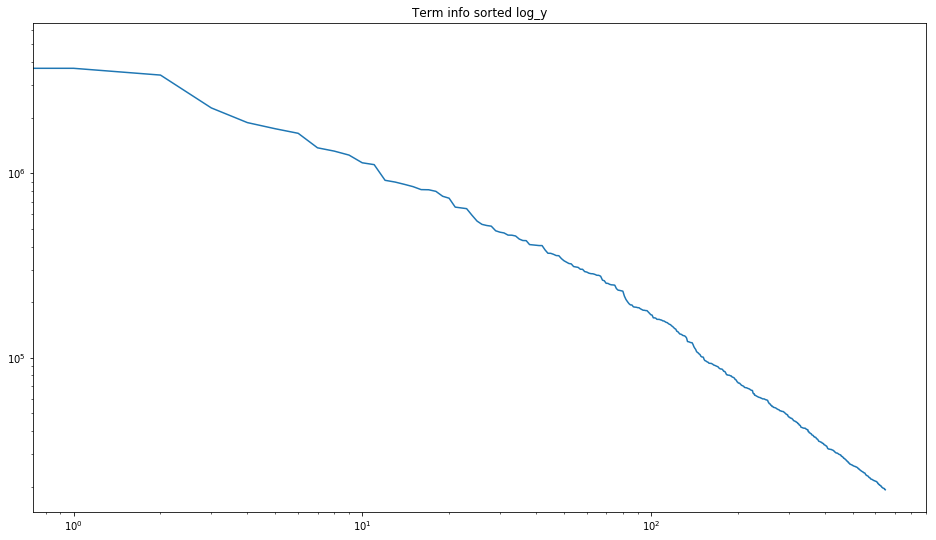

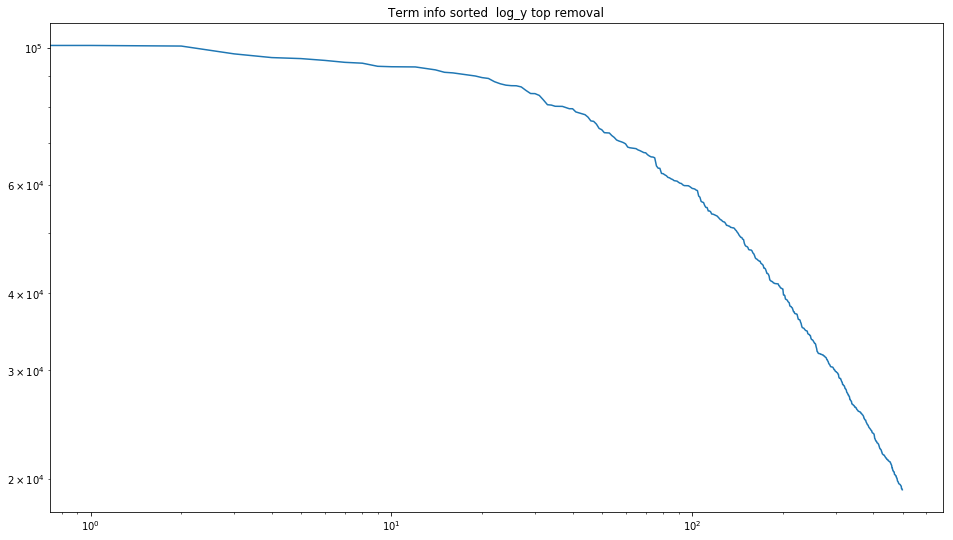

In [10]:
plt.figure(figsize=(16,9))
plt.yscale('log')
plt.xscale('log')
plt.plot(txt_info[indices])#[:500]])#top_n]])
plt.title("Term info sorted log_y")

plt.figure(figsize=(16,9))
plt.yscale('log')
plt.xscale('log')
plt.plot(txt_info[indices[150:]])#top_n]])
plt.title("Term info sorted  log_y top removal")

In [11]:
freq_filt=n_grams_counts[:,indices[150:]]
# indices[150:]

In [12]:
df_out=pd.SparseDataFrame(freq_filt,
                   columns=np.array(count_vect.get_feature_names())[indices[150:]],
                   index=list(blog_data.index))
df_out.fillna(0,inplace=True)

In [13]:
print(df_out.shape)
df_out.sample(20)

(611652, 500)


,though,school,always,ever,better,myself,let,year,another,many,...,president,english,cute,longer,internet,dead,rock,special,road,forget
42360,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50526,1,0,0,0,0,1,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0
197337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
417878,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
323131,1,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
527496,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59168,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
348421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
535664,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
644766,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# df_out.to_csv("df_out_full.csv")

# STOP!

In [23]:
auths_ids=blog_data["id"]
post_freq=pd.crosstab(auths_ids, columns="count")#pd.crosstab(auths_ids, columns="count")
print(post_freq.shape)
post_freq.sort_values("count",ascending=False)[:10]

(18981, 1)


col_0,count
id,
449628,4167
589736,2288
958176,2240
303162,2111
942828,2068
1270648,1943
1784456,1829
955372,1749
1078410,1708


In [ ]:
# freq_auth=[[auth_id,df_out.loc[blog_data["id"]==auth_id,].sum(axis=0)] for auth_id in np.unique(blog_data["id"])]
# len(freq_auth)

In [ ]:
# fr_auths=[[auth_id,df_out.loc[auths_ids==auth_id,].sum(axis=0)]for auth_id in auths_ids]
fr_auths=[list(df_out.loc[auths_ids==auth_id,].sum(axis=0)) for auth_id in list(set(auths_ids))]

In [ ]:
freqs_auths=pd.DataFrame(fr_auths,
                         index=list(set(auths_ids)),
                         columns=df_out.columns)

In [ ]:
freqs_auths.to_csv("freqs_auths.csv")